In [30]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [31]:
from src import spotify

In [160]:
token = spotify.get_token()

## Select Tracks

In [39]:
sel_tracks = spotify.search_tracks(token)

sel_tracks.head()

계속하시려면 next, 종료는 exit를 입력해주세요.exit


,id,name,artists,artists id
0,2FWquqPNxte8iqZ3ATQG0p,All I Wanna Do (K) (Feat. Hoody & Loco),Jay Park,4XDi67ZENZcbfKnvMnTYsI
1,4as4XEOR03oGm1STUKl6pa,BBIBBI,IU,3HqSLMAZ3g3d5poNaI7GOU
2,049M1ZP4H2B13yB2ax6N7l,그대라는 시,TAEYEON,3qNVuliS40BLgXGxhdBdqu
3,3mNbGPCLCxia3yvwWp2P51,It Takes Time,Loco,2e4G04F77jxVuDYo44TCSm


## get genres

In [94]:
genres = spotify.get_genres(token, sel_tracks)

genres

,count
k-pop,4
k-rap,2
korean r&b,2


## get features

In [212]:
features = spotify.get_features(token, sel_tracks)

features

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,2FWquqPNxte8iqZ3ATQG0p,0.403,0.724,8,-6.064,0.2460,0.377,0.000000,0.0927,0.428,97.133,216786
1,4as4XEOR03oGm1STUKl6pa,0.839,0.617,7,-4.692,0.3310,0.241,0.000000,0.3000,0.821,143.894,194426
2,049M1ZP4H2B13yB2ax6N7l,0.533,0.292,9,-7.100,0.0364,0.914,0.000000,0.1180,0.472,135.624,209482
3,3mNbGPCLCxia3yvwWp2P51,0.728,0.503,3,-7.147,0.0800,0.777,0.000003,0.2490,0.267,120.032,231602


## Seed Info

In [213]:
seed_info = pd.merge(left=sel_tracks, right=features, how='inner', on='id')

print("장르 Top : {}".format(genres.index[:5].values))
seed_info.head()

del seed_info['artists']
del seed_info['name']
seed_info.rename(columns={"artists id": "artists",
                         "id": "tracks"}, inplace=True)
seed_info

장르 Top : ['k-pop' 'k-rap' 'korean r&b']


,tracks,artists,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,2FWquqPNxte8iqZ3ATQG0p,4XDi67ZENZcbfKnvMnTYsI,0.403,0.724,8,-6.064,0.2460,0.377,0.000000,0.0927,0.428,97.133,216786
1,4as4XEOR03oGm1STUKl6pa,3HqSLMAZ3g3d5poNaI7GOU,0.839,0.617,7,-4.692,0.3310,0.241,0.000000,0.3000,0.821,143.894,194426
2,049M1ZP4H2B13yB2ax6N7l,3qNVuliS40BLgXGxhdBdqu,0.533,0.292,9,-7.100,0.0364,0.914,0.000000,0.1180,0.472,135.624,209482
3,3mNbGPCLCxia3yvwWp2P51,2e4G04F77jxVuDYo44TCSm,0.728,0.503,3,-7.147,0.0800,0.777,0.000003,0.2490,0.267,120.032,231602


In [214]:
_genres = genres.index[:5].values
seed_genres = reduce(lambda acc,cur: acc + cur + ",",_genres, "")
seed_genres = seed_genres[:-1]
seed_genres

'k-pop,k-rap,korean r&b'

# Recommend

In [215]:
# target cols 13 (except popularity)
feature_cols = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness',
'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
target_cols = list()
rename_cols = dict()

for col in feature_cols:
    target_col = "target_{}".format(col)
    rename_cols[col] = target_col
    
    target_cols.append(target_col)
    
seed_cols = ['tracks', 'artists']
for col in seed_cols:
    seed_col = "seed_{}".format(col)
    seed_info.rename(columns={
        col: seed_col
    }, inplace=True)
    
seed_info.rename(columns=rename_cols, inplace=True)
seed_info

,seed_tracks,seed_artists,target_danceability,target_energy,target_key,target_loudness,target_speechiness,target_acousticness,target_instrumentalness,target_liveness,target_valence,target_tempo,target_duration_ms
0,2FWquqPNxte8iqZ3ATQG0p,4XDi67ZENZcbfKnvMnTYsI,0.403,0.724,8,-6.064,0.2460,0.377,0.000000,0.0927,0.428,97.133,216786
1,4as4XEOR03oGm1STUKl6pa,3HqSLMAZ3g3d5poNaI7GOU,0.839,0.617,7,-4.692,0.3310,0.241,0.000000,0.3000,0.821,143.894,194426
2,049M1ZP4H2B13yB2ax6N7l,3qNVuliS40BLgXGxhdBdqu,0.533,0.292,9,-7.100,0.0364,0.914,0.000000,0.1180,0.472,135.624,209482
3,3mNbGPCLCxia3yvwWp2P51,2e4G04F77jxVuDYo44TCSm,0.728,0.503,3,-7.147,0.0800,0.777,0.000003,0.2490,0.267,120.032,231602


In [216]:
reco_uri = "https://api.spotify.com/v1/recommendations"

seed_dict = seed_info.iloc[0].to_dict()
seed_dict['seed_genres'] = seed_genres
seed_dict['market'] = "KR"
seed_dict['limit'] = 100

query = urlencode(seed_dict)
headers = {
    "authorization": "Bearer {}".format(token['access_token'])
}

res = req.get("{}?{}".format(reco_uri, query), headers=headers)
result = res.json()

In [217]:
reco_tracks = pd.DataFrame()

reco_tracks['id'] = [_['id'] for _ in result['tracks']]

reco_tracks

,id
0,6z1kLsntE7FuzKZHZWrXYN
1,2PcJoVkfjcbvoqBxV1Nj7y
2,4Cdyx3bs8mMYVJWP3wHPXj
3,3mjfQvA5gAV6XnH0ZWnIyI
4,1pz24zu5H9A0S1a2NKT4F0
...,...
95,4LOLvDtzykDC7y9WehFoOi
96,6yYAcOlhsYR9jVZPYoHvYc
97,24UUm3hRRZvyPyasjgtHQ0
98,5FbiD78OtBrsaX8KP5DmDP


In [218]:
reco_features = spotify.get_features(token, reco_tracks)

reco_features

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6z1kLsntE7FuzKZHZWrXYN,0.463,0.566,8,-6.195,0.1450,0.1960,0.000000,0.2840,0.219,93.921,255729
1,2PcJoVkfjcbvoqBxV1Nj7y,0.613,0.668,8,-6.867,0.2670,0.2450,0.000000,0.0735,0.509,96.176,209393
2,4Cdyx3bs8mMYVJWP3wHPXj,0.688,0.612,8,-6.303,0.0574,0.7200,0.000000,0.1060,0.692,90.022,225800
3,3mjfQvA5gAV6XnH0ZWnIyI,0.678,0.809,8,-4.162,0.0598,0.0383,0.000000,0.2430,0.561,119.979,223515
4,1pz24zu5H9A0S1a2NKT4F0,0.855,0.580,5,-6.951,0.1410,0.2340,0.000000,0.0965,0.518,96.998,219391
...,...,...,...,...,...,...,...,...,...,...,...,...
95,4LOLvDtzykDC7y9WehFoOi,0.608,0.706,7,-7.275,0.0853,0.0595,0.000000,0.0560,0.357,124.985,233099
96,6yYAcOlhsYR9jVZPYoHvYc,0.783,0.586,11,-6.521,0.0926,0.5080,0.000005,0.1040,0.751,80.999,226990
97,24UUm3hRRZvyPyasjgtHQ0,0.776,0.460,5,-6.504,0.3270,0.4320,0.000008,0.1540,0.325,140.011,209560
98,5FbiD78OtBrsaX8KP5DmDP,0.841,0.639,0,-5.212,0.1430,0.0204,0.000002,0.2960,0.472,98.007,219089


In [183]:


(reco_features[feature_cols[0]] - reco_features[feature_cols[0]].min()) / \
    (reco_features[feature_cols[0]].max() - reco_features[feature_cols[0]].min())

0     0.289575
1     0.294327
2     0.044015
3     0.276507
4     0.055064
        ...   
95    0.265815
96    0.025007
97    0.195723
98    0.209979
99    0.324027
Name: acousticness, Length: 100, dtype: float64

In [220]:
_sel_features = pd.merge(left=sel_tracks, right=features, how='inner', on='id')

del _sel_features['artists']
del _sel_features['artists id']
del _sel_features['name']

_sel_features

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,2FWquqPNxte8iqZ3ATQG0p,0.403,0.724,8,-6.064,0.2460,0.377,0.000000,0.0927,0.428,97.133,216786
1,4as4XEOR03oGm1STUKl6pa,0.839,0.617,7,-4.692,0.3310,0.241,0.000000,0.3000,0.821,143.894,194426
2,049M1ZP4H2B13yB2ax6N7l,0.533,0.292,9,-7.100,0.0364,0.914,0.000000,0.1180,0.472,135.624,209482
3,3mNbGPCLCxia3yvwWp2P51,0.728,0.503,3,-7.147,0.0800,0.777,0.000003,0.2490,0.267,120.032,231602


In [222]:
merge_features = pd.concat([_sel_features, reco_features])
norm_features = merge_features.copy()

In [223]:
for col in feature_cols:
    norm_features[col] = (merge_features[col] - merge_features[col].min()) / \
        (merge_features[col].max() - merge_features[col].min())

In [224]:
norm_features

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,2FWquqPNxte8iqZ3ATQG0p,0.185374,0.686614,0.727273,0.396410,0.626380,0.411668,0.000000,0.094278,0.368932,0.212050,0.410000
1,4as4XEOR03oGm1STUKl6pa,0.926871,0.518110,0.636364,0.608696,0.866969,0.262668,0.000000,0.418386,0.845874,0.659588,0.208567
2,049M1ZP4H2B13yB2ax6N7l,0.406463,0.006299,0.818182,0.236113,0.033116,1.000000,0.000000,0.133834,0.422330,0.580437,0.344201
3,3mNbGPCLCxia3yvwWp2P51,0.738095,0.338583,0.272727,0.228841,0.156524,0.849904,0.000031,0.338649,0.173544,0.431210,0.543471
0,6z1kLsntE7FuzKZHZWrXYN,0.287415,0.437795,0.727273,0.376141,0.340504,0.213366,0.000000,0.393371,0.115291,0.181308,0.760822
...,...,...,...,...,...,...,...,...,...,...,...,...
95,4LOLvDtzykDC7y9WehFoOi,0.534014,0.658268,0.636364,0.209036,0.171526,0.063818,0.000000,0.036898,0.282767,0.478614,0.556957
96,6yYAcOlhsYR9jVZPYoHvYc,0.831633,0.469291,1.000000,0.325700,0.192188,0.555190,0.000061,0.111945,0.760922,0.057635,0.501923
97,24UUm3hRRZvyPyasjgtHQ0,0.819728,0.270866,0.454545,0.328330,0.855647,0.471925,0.000095,0.190119,0.243932,0.622424,0.344903
98,5FbiD78OtBrsaX8KP5DmDP,0.930272,0.552756,0.000000,0.528238,0.334843,0.020981,0.000022,0.412133,0.422330,0.220414,0.430746


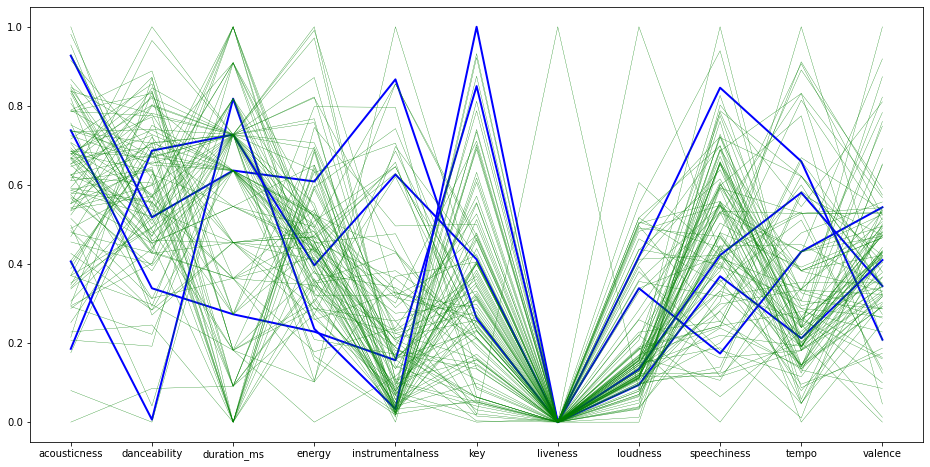

In [252]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
x_ticks_labels = norm_features.columns.difference(['id']).values

for _idx in range(len(norm_features)):
    feature = norm_features.iloc[_idx]
    _id = feature['id']
    if _id in sel_tracks['id'].values:
        plt.plot(x_ticks_labels, feature.values[1:],color="b", linewidth=2)
    else:
        plt.plot(x_ticks_labels, feature.values[1:],color="g", linewidth=0.3)

In [253]:
from sklearn.metrics.pairwise import euclidean_distances as euc

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,2FWquqPNxte8iqZ3ATQG0p,0.185374,0.686614,0.727273,0.396410,0.626380,0.411668,0.000000,0.094278,0.368932,0.212050,0.410000
1,4as4XEOR03oGm1STUKl6pa,0.926871,0.518110,0.636364,0.608696,0.866969,0.262668,0.000000,0.418386,0.845874,0.659588,0.208567
2,049M1ZP4H2B13yB2ax6N7l,0.406463,0.006299,0.818182,0.236113,0.033116,1.000000,0.000000,0.133834,0.422330,0.580437,0.344201
3,3mNbGPCLCxia3yvwWp2P51,0.738095,0.338583,0.272727,0.228841,0.156524,0.849904,0.000031,0.338649,0.173544,0.431210,0.543471
0,6z1kLsntE7FuzKZHZWrXYN,0.287415,0.437795,0.727273,0.376141,0.340504,0.213366,0.000000,0.393371,0.115291,0.181308,0.760822
...,...,...,...,...,...,...,...,...,...,...,...,...
95,4LOLvDtzykDC7y9WehFoOi,0.534014,0.658268,0.636364,0.209036,0.171526,0.063818,0.000000,0.036898,0.282767,0.478614,0.556957
96,6yYAcOlhsYR9jVZPYoHvYc,0.831633,0.469291,1.000000,0.325700,0.192188,0.555190,0.000061,0.111945,0.760922,0.057635,0.501923
97,24UUm3hRRZvyPyasjgtHQ0,0.819728,0.270866,0.454545,0.328330,0.855647,0.471925,0.000095,0.190119,0.243932,0.622424,0.344903
98,5FbiD78OtBrsaX8KP5DmDP,0.930272,0.552756,0.000000,0.528238,0.334843,0.020981,0.000022,0.412133,0.422330,0.220414,0.430746


In [269]:
sel_cols = [_ in sel_tracks['id'].values for _ in norm_features['id']]
target_cols =  [_ not in sel_tracks['id'].values for _ in norm_features['id']]

compare_1 = norm_features[sel_cols].values[:,1:]
compare_2 = norm_features[target_cols].values[:,1:]

In [274]:
euc_result = euc(compare_2, compare_1)

In [277]:
euc_result[0].sum()

4.23433087061134

In [284]:
score_features = norm_features[target_cols].copy()
score_features['score'] = euc_result.sum(axis=1)

In [288]:
_sort_features = score_features.sort_values(by=['score'])

In [294]:
length = 30

pd.concat([_sort_features[:length], ])
plt.figure(figsize=(16,8))
x_ticks_labels = norm_features.columns.difference(['id']).values

for _idx in range(len(norm_features)):
    feature = norm_features.iloc[_idx]
    _id = feature['id']
    if _id in sel_tracks['id'].values:
        plt.plot(x_ticks_labels, feature.values[1:],color="b", linewidth=2)
    else:
        plt.plot(x_ticks_labels, feature.values[1:],color="g", linewidth=0.3)


,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,score
50,0nHB8bNZtg3BuAkWr7uJNc,0.484694,0.283465,0.454545,0.410336,0.022361,0.631882,0.000000,0.118199,0.445388,0.448926,0.345570,3.349789
11,2IgbYlOlFpiSFYnsqB39lM,0.515306,0.311811,0.727273,0.422869,0.209171,0.361271,0.000000,0.168230,0.331311,0.600115,0.272393,3.400503
27,08bhA1FcwVfyE6RBwdsMFP,0.539116,0.571654,0.909091,0.320749,0.320691,0.423720,0.000000,0.129143,0.722087,0.294176,0.341417,3.607198
7,072zJPb2mwUjrJLKJxYFLe,0.408163,0.680315,0.636364,0.480891,0.163034,0.319638,0.000000,0.155722,0.503641,0.383615,0.466520,3.619554
1,2PcJoVkfjcbvoqBxV1Nj7y,0.542517,0.598425,0.727273,0.272165,0.685819,0.267050,0.000000,0.064259,0.467233,0.202890,0.343399,3.643997
68,6dJ4jLQMM8SXGYrM0eRCNm,0.840136,0.458268,0.636364,0.446078,0.077838,0.401808,0.000000,0.119762,0.544903,0.430387,0.495509,3.652270
22,7hg44Uac2HOBJCLWsHXMQp,0.479592,0.428346,0.363636,0.178091,0.238607,0.526705,0.000000,0.138524,0.280340,0.046294,0.428260,3.681967
41,0OWBz5FCeATA2zhHgAk7Uh,0.836735,0.500787,0.818182,0.351540,0.382961,0.244043,0.000000,0.077861,0.415049,0.527415,0.529643,3.729516
31,5ZB78ePnCLHREvjQMuVtzY,0.370748,0.492913,0.636364,0.286245,0.224455,0.159682,0.000000,0.355847,0.317961,0.353850,0.351966,3.730658
19,4AtDiqnMxDt8crflZWgZG5,0.352041,0.491339,0.818182,0.515395,0.289556,0.473021,0.000000,0.113508,0.237864,0.138718,0.650583,3.752040
